In [1]:
pip install numpy pandas matplotlib scikit-learn


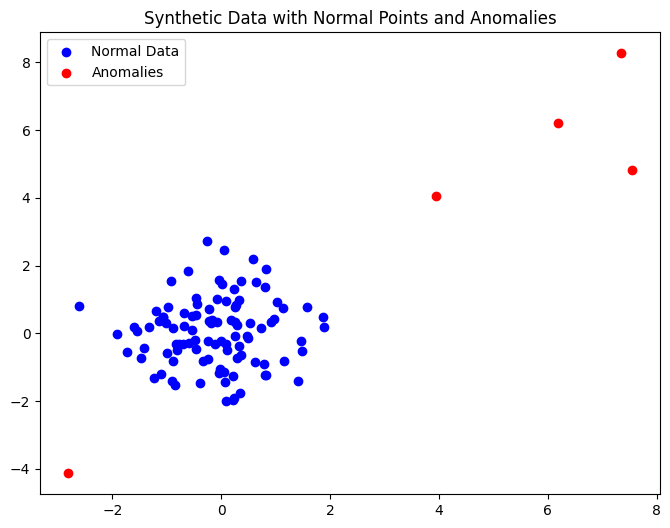

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Generate synthetic data
np.random.seed(42)

# Normal data: 100 points from a Gaussian distribution
X_normal = np.random.normal(loc=0, scale=1, size=(100, 2))

# Anomalous data: 5 points that are far from the normal data
X_anomalous = np.random.uniform(low=-10, high=10, size=(5, 2))

# Combine normal and anomalous data
X = np.vstack([X_normal, X_anomalous])

# Convert to DataFrame for easier visualization
data = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

# Plot the data to visualize the normal points and anomalies
plt.figure(figsize=(8, 6))
plt.scatter(X_normal[:, 0], X_normal[:, 1], label='Normal Data', color='blue')
plt.scatter(X_anomalous[:, 0], X_anomalous[:, 1], label='Anomalies', color='red')
plt.title("Synthetic Data with Normal Points and Anomalies")
plt.legend()
plt.show()


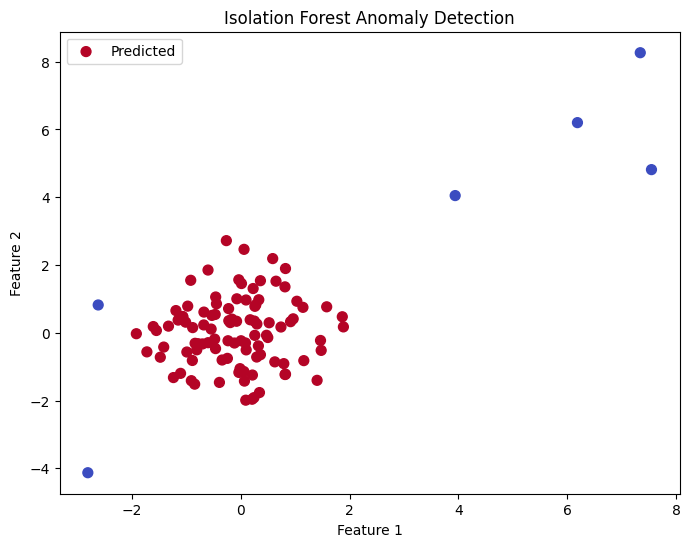

Predicted labels (-1 for anomalies, 1 for normal points):
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1]


In [3]:
# Step 2: Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # 5% of the data is expected to be anomalous
model.fit(X)

# Step 3: Predict anomalies
y_pred = model.predict(X)

# The predictions are 1 for normal points and -1 for anomalies
# Plotting the data and highlighting the anomalies
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature 1'], data['Feature 2'], c=y_pred, cmap='coolwarm', label='Predicted', s=50)
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Step 4: Show the results
print("Predicted labels (-1 for anomalies, 1 for normal points):")
print(y_pred)
